## <center> Import Libs

In [240]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings 
warnings.filterwarnings('ignore')

## <center> Import Data

In [241]:
data = pd.read_csv('data/cars.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## <center> Data Info

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [243]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## <center> Null data / Duplicates

In [244]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [245]:
print(f'Duplicated data: {data.duplicated().sum()}')

Duplicated data: 0


In [246]:
data.set_index('car_ID', inplace=True)

## <center> Feature Creation

In [247]:
data['brand'] = data['CarName'].map(lambda x: x.split()[0])
data['brand'].sample(5)

car_ID
79     mitsubishi
98         nissan
152        toyota
45          isuzu
41          honda
Name: brand, dtype: object

## <center> Dividing columns into Numeric and Categorical

In [248]:
nums = [
    'wheelbase', 
    'carlength',
    'carwidth', 
    'carheight', 
    'curbweight',
    'enginesize',
    'boreratio', 
    'stroke', 
    'compressionratio',
    'horsepower', 
    'peakrpm', 
    'citympg', 
    'highwaympg', 
    'price'
]

cats = [
    'doornumber',
    'symboling', 
    'CarName', 
    'fueltype', 
    'aspiration', 
    'carbody', 
    'drivewheel', 
    'enginelocation',
    'cylindernumber',
    'enginetype', 
    'fuelsystem',
    'brand'
]

## <center> Univariate Analysis

In [249]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [250]:
type_values = data['fueltype'].value_counts().index
type_counts = data['fueltype'].value_counts().values

px.pie(
    names=type_values,
    values=type_counts,
    hole=0.4,
    title="Distribution of Fueltype"
)

In [251]:
type_values = data['carbody'].value_counts().index
type_counts = data['carbody'].value_counts().values

px.pie(
    names=type_values,
    values=type_counts,
    hole=0.4,
    title="Distribution of Car Body"
)

<AxesSubplot:xlabel='price', ylabel='Count'>

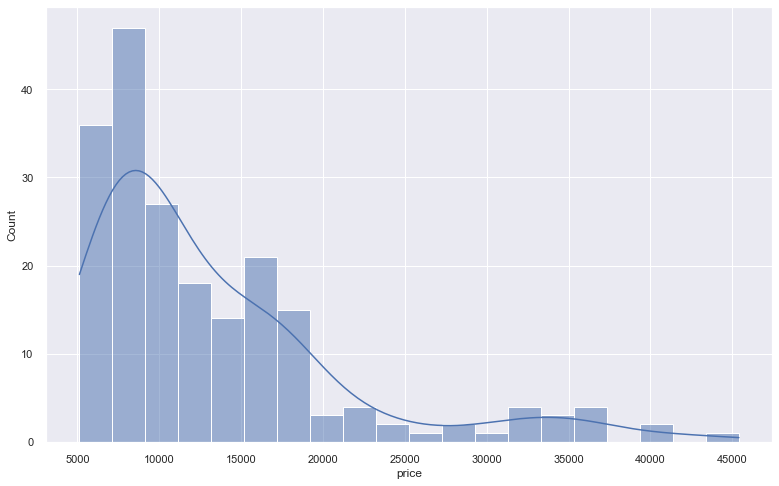

In [252]:
sns.histplot(data['price'], kde=True, bins=20)

## <center> Outlier Detection

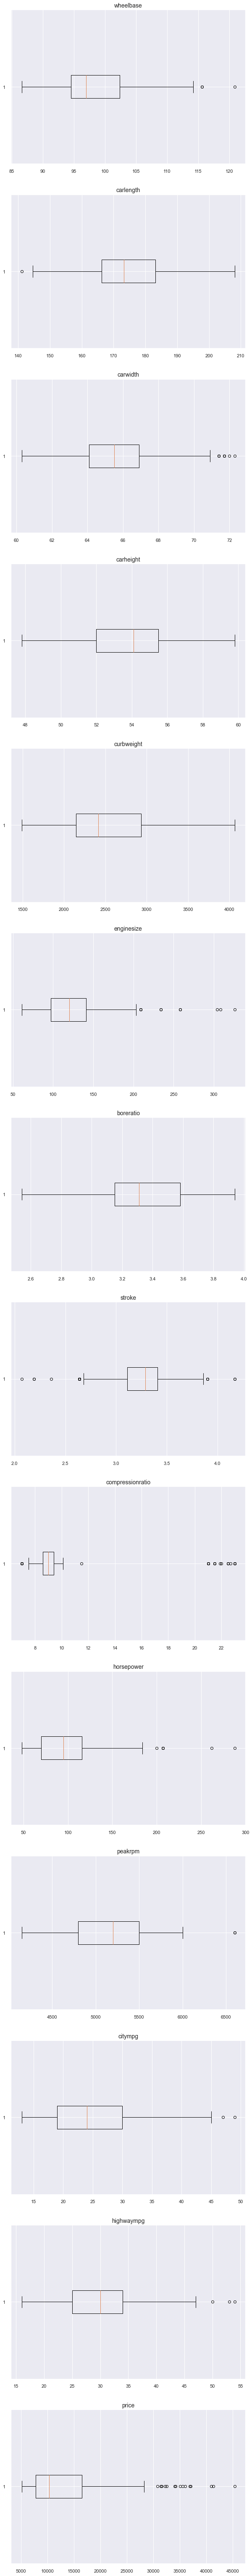

In [253]:
fig, axs = plt.subplots(nrows = len(nums), ncols= 1, figsize = (10, len(nums)*8))

for i, ax in enumerate(axs.flat):
    ax = ax.boxplot(data[nums].iloc[:,i], vert = False)
    axs[i].set_title(nums[i], fontsize = 14)


## <center> Outlier Treatment using IQR

In [254]:
def calculate_limits(column):
    Q1, Q3 = np.percentile(column, [25, 75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    return ll, ul

for col in nums[:-1]:
    lower, upper = calculate_limits(data[col])
    data[data[col] < lower][col] = lower
    data[data[col] > upper][col] = upper

## <center> Correlation Check

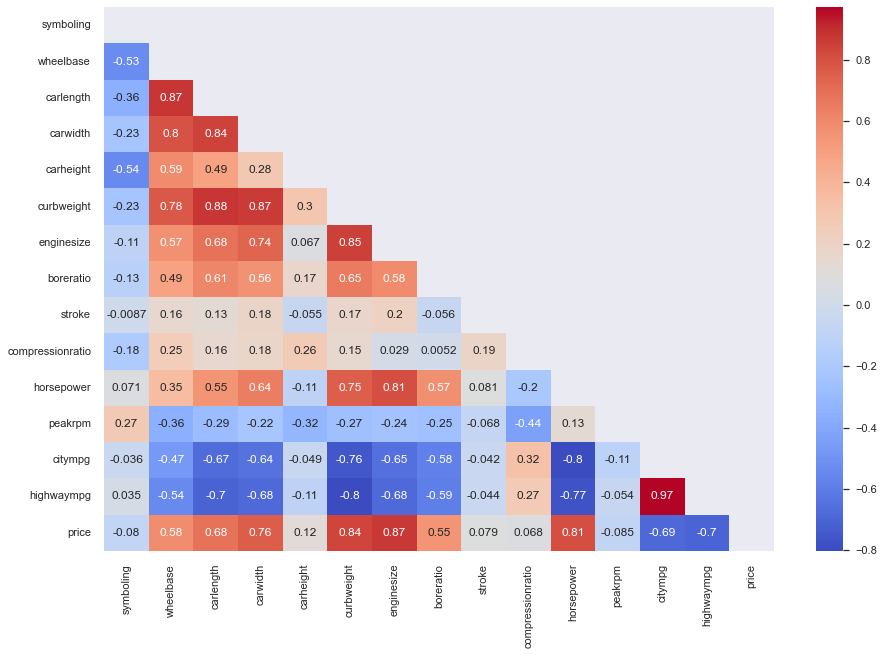

In [255]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(
    data.corr(), 
    mask=mask, 
    cmap='coolwarm', 
    annot = True,
)
sns.set(font_scale=1.2)

## <center> Data Scaling

In [256]:
scaler = StandardScaler()
data[nums[:-1]] = scaler.fit_transform(data[nums[:-1]])

data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000
mean,0.834146,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,13276.710571
std,1.245307,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,7988.852332
min,-2.000000,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,5118.000000
25%,0.000000,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,7788.000000
50%,1.000000,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,10295.000000
75%,2.000000,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,16503.000000
max,3.000000,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,45400.000000


## <center> Label encoding

In [257]:
data[cats]

,doornumber,symboling,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,cylindernumber,enginetype,fuelsystem,brand
car_ID,,,,,,,,,,,,
1,two,3,alfa-romero giulia,gas,std,convertible,rwd,front,four,dohc,mpfi,alfa-romero
2,two,3,alfa-romero stelvio,gas,std,convertible,rwd,front,four,dohc,mpfi,alfa-romero
3,two,1,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,six,ohcv,mpfi,alfa-romero
4,four,2,audi 100 ls,gas,std,sedan,fwd,front,four,ohc,mpfi,audi
5,four,2,audi 100ls,gas,std,sedan,4wd,front,five,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
201,four,-1,volvo 145e (sw),gas,std,sedan,rwd,front,four,ohc,mpfi,volvo
202,four,-1,volvo 144ea,gas,turbo,sedan,rwd,front,four,ohc,mpfi,volvo
203,four,-1,volvo 244dl,gas,std,sedan,rwd,front,six,ohcv,mpfi,volvo


In [258]:
encoder = LabelEncoder()

for cat in cats:
    data[cat] = encoder.fit_transform(data[cat])

## <center> Modeling

In [259]:
from pycaret.regression import *

clf = setup(
    data, 
    target = "price", 
    session_id = 1, 
    preprocess=False, 
    train_size = 0.9
)
compare_models()

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Data shape,"(205, 26)"
4,Train data shape,"(184, 26)"
5,Test data shape,"(21, 26)"
6,Numeric features,25


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1358.3838,4027118.2703,1939.7199,0.9401,0.1289,0.1017,0.0120
et,Extra Trees Regressor,1381.1716,4071400.5560,1963.6017,0.9380,0.1314,0.1023,0.0280
catboost,CatBoost Regressor,1427.9293,4366962.1804,2055.9282,0.9314,0.1326,0.1052,0.1890
rf,Random Forest Regressor,1443.3356,4529442.3444,2067.7481,0.9312,0.1360,0.1062,0.0360
xgboost,Extreme Gradient Boosting,1513.3381,5002274.6250,2192.7609,0.9226,0.1353,0.1069,0.0160
ada,AdaBoost Regressor,1936.4409,6113067.2038,2424.2600,0.9047,0.1817,0.1620,0.0120
lightgbm,Light Gradient Boosting Machine,1727.2777,6691396.9242,2539.0016,0.8946,0.1576,0.1257,0.0070
dt,Decision Tree Regressor,1789.2286,7560617.6722,2675.8694,0.8855,0.1734,0.1313,0.0060
llar,Lasso Least Angle Regression,2204.4880,9010637.1228,2949.5664,0.8632,0.2167,0.1750,0.0070
lasso,Lasso Regression,2234.2242,9171281.7906,2975.4168,0.8604,0.2270,0.1807,0.0060


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=1)